In [3]:
!pip install medmnist
!pip install torchinfo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 849.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha2

100%|██████████| 54.9M/54.9M [00:05<00:00, 10.3MB/s]


Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Class Distribution:
Class 0: 33484 samples
Class 1: 10213 samples
Class 2: 7754 samples
Class 3: 46026 samples

Pixel Value Statistics:
Mean: 48.1803, Std: 50.0505


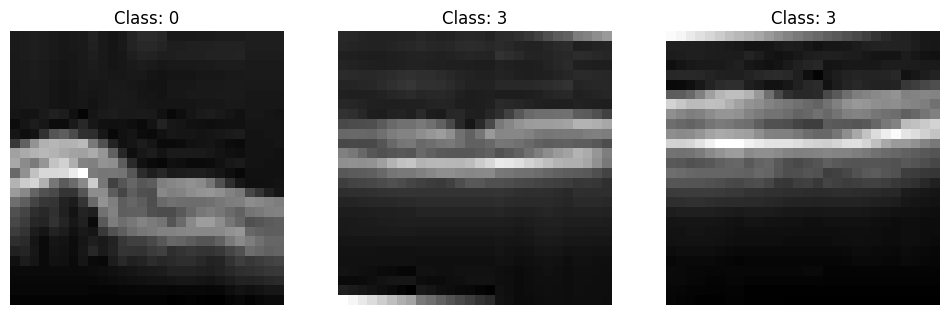

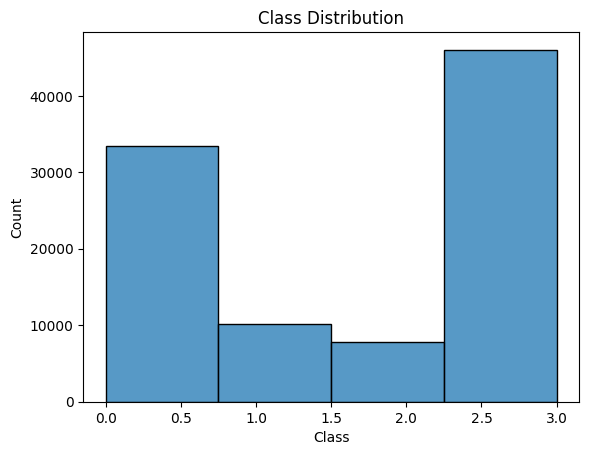

Number of classes in OCTMNIST: 4
MyCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc): Linear(in_features=256, out_features=4, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
MyCNN                                    [1, 4]                    --
├─Conv2d: 1-1                            [1, 32, 28, 28]           320
├─BatchNorm2d: 1-2                       [1, 32, 28, 28]           64
├─Conv2d: 1-3                            [1, 64, 28, 28]           18,496
├─BatchNorm2d: 1-4                       [1, 64, 28, 28]           128
├─MaxPool2d: 1-5                         [1, 64, 14, 14]           --
├─Conv2d: 1-6                            [1, 128, 14, 14]          73,856
├─BatchNorm2d: 1-7                       [1, 128, 14, 14]          256
├─MaxPool2d: 1-8                         [1, 128, 7, 7]            --
├─Conv2d: 1-9                            [1, 256, 7, 7]            295,168
├─BatchNorm2d: 1-10                      [1, 256, 7, 7]            512
├─MaxPool2d: 1-11                        [1, 256, 3, 3]            --
├─AdaptiveAvgPool2d: 1-12                [1, 256, 1, 1]            -

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from medmnist import OCTMNIST
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torchinfo import summary
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Data Loading, Analysis, and Preprocessing
def load_data():
    #Define data augmentation for training and a basic transform for validation/test.
    transform_train = transforms.Compose([
        transforms.RandomRotation(15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])
    transform_test = transforms.Compose([
        transforms.ToTensor(),
    ])

    # transform_train = transforms.Compose([
    # transforms.RandomRotation(10),  # Random rotation by up to 10 degrees
    # transforms.RandomHorizontalFlip(),  # Random horizontal flip
    # transforms.RandomVerticalFlip(),  # Random vertical flip
    # transforms.RandomAffine(0, translate=(0.1, 0.1)),  # Random affine transformation
    # transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
    # ])

    transform_test = transforms.Compose([
    transforms.ToTensor(),
    ])

    # Load OCTMNIST dataset
    train_dataset = OCTMNIST(split='train', download=True, transform=transform_train)
    test_dataset  = OCTMNIST(split='test', download=True, transform=transform_test)
    val_dataset   = OCTMNIST(split='val', download=True, transform=transform_test)

    # Create DataLoaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_dataset, test_dataset, val_dataset, train_loader, val_loader, test_loader

def analyze_dataset(y_train, X_train):
    # Analyze class distribution
    unique, counts = np.unique(y_train, return_counts=True)
    print("Class Distribution:")
    for cls, count in zip(unique, counts):
        print(f"Class {cls}: {count} samples")

    # Basic pixel statistics
    print("\nPixel Value Statistics:")
    print(f"Mean: {np.mean(X_train):.4f}, Std: {np.std(X_train):.4f}")

def visualize_data(X_train, y_train):
    # Display a few sample images with their labels
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for i, ax in enumerate(axes):
        ax.imshow(X_train[i].squeeze(), cmap='gray')
        # Adjust label display if necessary
        label_val = y_train[i][0] if isinstance(y_train[i], (list, np.ndarray)) else y_train[i]
        ax.set_title(f"Class: {label_val}")
        ax.axis("off")
    plt.show()

    # Plot class distribution
    sns.histplot(np.array(y_train).squeeze(), bins=len(np.unique(y_train)), kde=False)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Class Distribution")
    plt.show()


# 2. Define CNN Model
class MyCNN(nn.Module):
    def __init__(self, num_classes):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# 3. Main Execution: Data, Model, and Training
# Load data
train_dataset, test_dataset, val_dataset, train_loader, val_loader, test_loader = load_data()

# For analysis/visualization
X_train = train_dataset.imgs
y_train = train_dataset.labels

analyze_dataset(y_train, X_train)
visualize_data(X_train, y_train)

# Determine number of classes from the training labels
num_classes = len(np.unique(train_dataset.labels))
print(f"Number of classes in OCTMNIST: {num_classes}")

# Instantiate the model and move to device
model = MyCNN(num_classes=num_classes).to(device)
print(model)
summary(model, input_size=(1, 1, 28, 28))

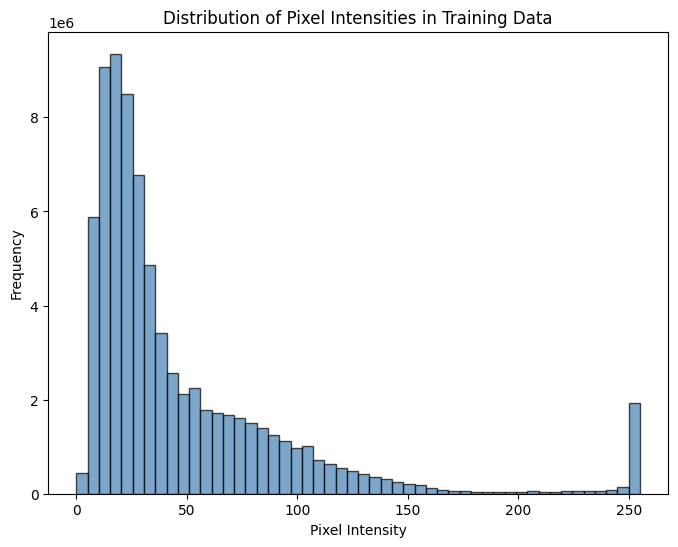

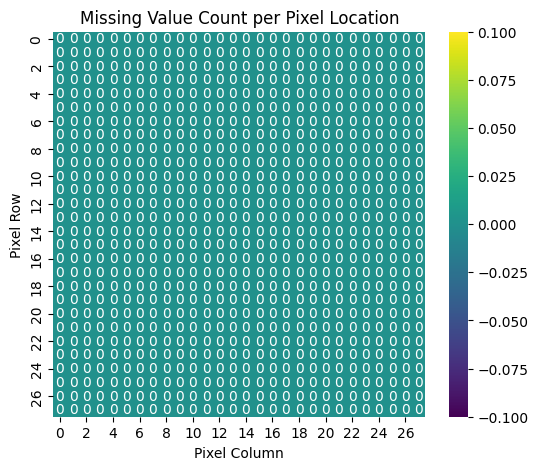

Missing values for each feature (pixel index):
Feature 0: 0
Feature 1: 0
Feature 2: 0
Feature 3: 0
Feature 4: 0
Feature 5: 0
Feature 6: 0
Feature 7: 0
Feature 8: 0
Feature 9: 0
Feature 10: 0
Feature 11: 0
Feature 12: 0
Feature 13: 0
Feature 14: 0
Feature 15: 0
Feature 16: 0
Feature 17: 0
Feature 18: 0
Feature 19: 0
Feature 20: 0
Feature 21: 0
Feature 22: 0
Feature 23: 0
Feature 24: 0
Feature 25: 0
Feature 26: 0
Feature 27: 0
Feature 28: 0
Feature 29: 0
Feature 30: 0
Feature 31: 0
Feature 32: 0
Feature 33: 0
Feature 34: 0
Feature 35: 0
Feature 36: 0
Feature 37: 0
Feature 38: 0
Feature 39: 0
Feature 40: 0
Feature 41: 0
Feature 42: 0
Feature 43: 0
Feature 44: 0
Feature 45: 0
Feature 46: 0
Feature 47: 0
Feature 48: 0
Feature 49: 0
Feature 50: 0
Feature 51: 0
Feature 52: 0
Feature 53: 0
Feature 54: 0
Feature 55: 0
Feature 56: 0
Feature 57: 0
Feature 58: 0
Feature 59: 0
Feature 60: 0
Feature 61: 0
Feature 62: 0
Feature 63: 0
Feature 64: 0
Feature 65: 0
Feature 66: 0
Feature 67: 0
Feature 68:

In [17]:
# Additional Graphs and Missing Values Analysis

# Distribution of pixel intensities across all training images
all_pixels = np.concatenate([img.flatten() for img in X_train])
plt.figure(figsize=(8, 6))
plt.hist(all_pixels, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Pixel Intensities in Training Data")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

#Heatmap of missing values per pixel location across training images
missing_matrix = np.zeros((28, 28), dtype=int)
for img in X_train:
    # Ensure the image is squeezed to 2D (in case it has a channel dimension)
    img_2d = np.squeeze(img)
    # Count missing (NaN) values per pixel and accumulate
    missing_matrix += np.isnan(img_2d).astype(int)

plt.figure(figsize=(6, 5))
sns.heatmap(missing_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Missing Value Count per Pixel Location")
plt.xlabel("Pixel Column")
plt.ylabel("Pixel Row")
plt.show()

# Print the number of missing values for each feature
X_train_flat = np.array([img.flatten() for img in X_train])
missing_counts = np.isnan(X_train_flat).sum(axis=0)

print("Missing values for each feature (pixel index):")
for idx, count in enumerate(missing_counts):
    print(f"Feature {idx}: {count}")


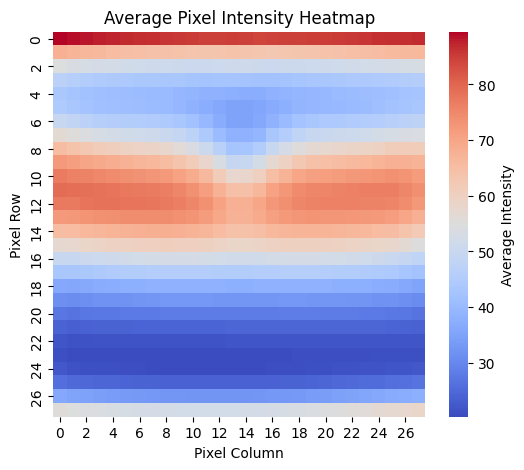

In [18]:
# Average Pixel Intensity Heatmap
X_train_array = np.array([np.squeeze(np.array(img)) for img in X_train])

# Compute the average pixel intensity across all training images (resulting in a 28x28 matrix)
avg_intensity = np.mean(X_train_array, axis=0)

# Plot the heatmap of average pixel intensities
plt.figure(figsize=(6, 5))
sns.heatmap(avg_intensity, cmap='coolwarm', cbar_kws={'label': 'Average Intensity'})
plt.title("Average Pixel Intensity Heatmap")
plt.xlabel("Pixel Column")
plt.ylabel("Pixel Row")
plt.show()


In [5]:
# 4. Training the Neural Network

#loss function – using CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)


num_epochs = 50  # Increased number of epochs
best_val_loss = float('inf')
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    running_corrects = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).squeeze()

        optimizer.zero_grad()          # Clear gradients
        outputs = model(inputs)        # Forward pass
        loss = loss_function(outputs, labels)  # Compute loss
        loss.backward()                # Backpropagation
        optimizer.step()               # Update weights

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
        total_train += inputs.size(0)

    epoch_loss = running_loss / total_train
    epoch_acc  = running_corrects.double() / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation phase (no gradients)
    model.eval()  # Evaluation mode
    val_running_loss = 0.0
    val_running_corrects = 0
    total_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device).squeeze()
            val_outputs = model(val_inputs)
            val_loss = loss_function(val_outputs, val_labels)
            val_running_loss += val_loss.item() * val_inputs.size(0)
            _, val_preds = torch.max(val_outputs, 1)
            val_running_corrects += torch.sum(val_preds == val_labels.data)
            total_val += val_inputs.size(0)

    val_epoch_loss = val_running_loss / total_val
    val_epoch_acc  = val_running_corrects.double() / total_val
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    # Step scheduler with validation loss
    scheduler.step(val_epoch_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

    # Save best model weights based on validation loss
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        torch.save(model.state_dict(), "model_weights.pt")

total_training_time = time.time() - start_time
print(f"Training completed in: {total_training_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1/50 - Train Loss: 0.5147, Train Acc: 0.8214, Val Loss: 0.4222, Val Acc: 0.8584
Epoch 2/50 - Train Loss: 0.3886, Train Acc: 0.8640, Val Loss: 0.3562, Val Acc: 0.8778
Epoch 3/50 - Train Loss: 0.3505, Train Acc: 0.8778, Val Loss: 0.3183, Val Acc: 0.8885
Epoch 4/50 - Train Loss: 0.3250, Train Acc: 0.8864, Val Loss: 0.2879, Val Acc: 0.9015
Epoch 5/50 - Train Loss: 0.3096, Train Acc: 0.8918, Val Loss: 0.2764, Val Acc: 0.9064
Epoch 6/50 - Train Loss: 0.2988, Train Acc: 0.8949, Val Loss: 0.2684, Val Acc: 0.9091
Epoch 7/50 - Train Loss: 0.2867, Train Acc: 0.8988, Val Loss: 0.3033, Val Acc: 0.8924
Epoch 8/50 - Train Loss: 0.2797, Train Acc: 0.9013, Val Loss: 0.2717, Val Acc: 0.9068
Epoch 9/50 - Train Loss: 0.2716, Train Acc: 0.9043, Val Loss: 0.2452, Val Acc: 0.9163
Epoch 10/50 - Train Loss: 0.2654, Train Acc: 0.9074, Val Loss: 0.2579, Val Acc: 0.9111
Epoch 11/50 - Train Loss: 0.2584, Train Acc: 0.9095, Val Loss: 0.2448, Val Acc: 0.9173
Epoch 12/50 - Train Loss: 0.2552, Train Acc: 0.9107,

In [6]:
# 5. Evaluate the Model on Test Data
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).squeeze()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print("\nTest Metrics:")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Train Loss')
# plt.plot(val_losses, label='Val Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Loss over Epochs')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(train_accuracies, label='Train Accuracy')
# plt.plot(val_accuracies, label='Val Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Accuracy over Epochs')
# plt.legend()

# plt.tight_layout()
# plt.show()


Test Metrics:
Accuracy: 76.70%
Precision: 80.25%
Recall: 76.70%
F1 Score: 74.99%
Confusion Matrix:
[[246   2   0   2]
 [ 44 197   4   5]
 [ 85   4  95  66]
 [  5   3  13 229]]


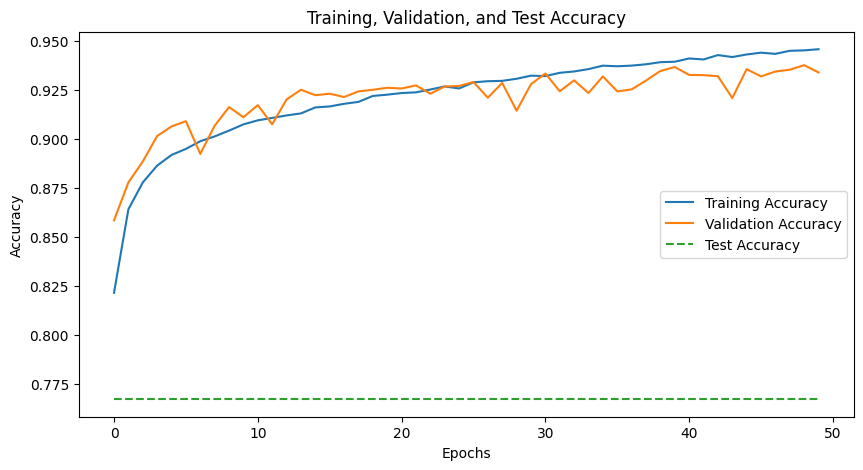

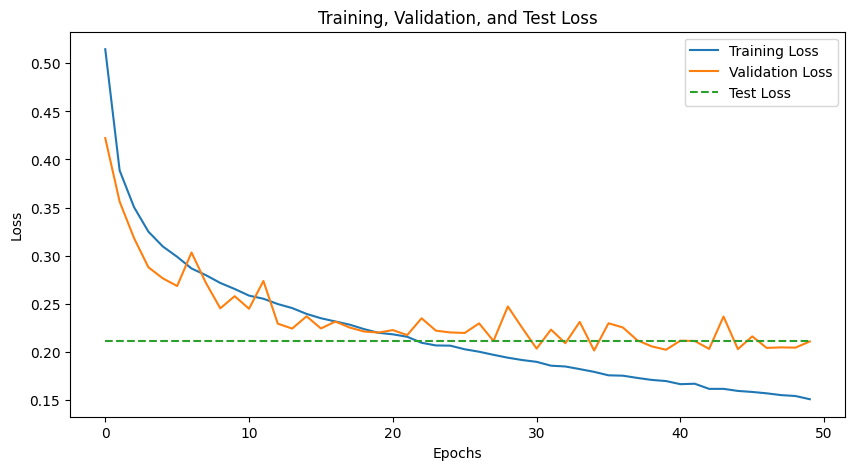

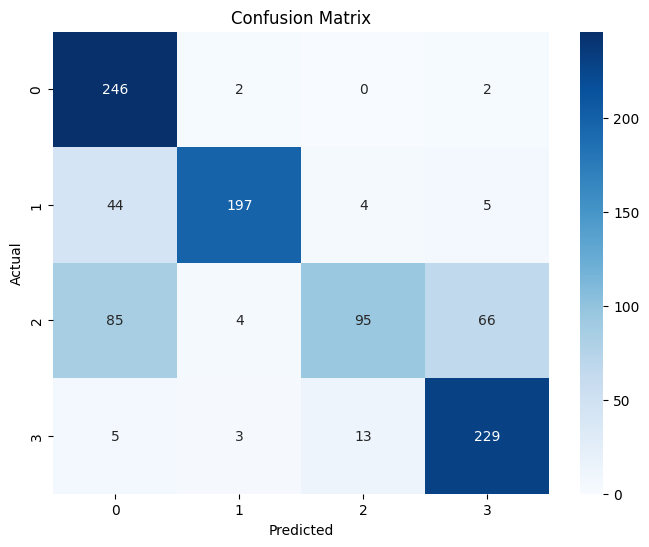

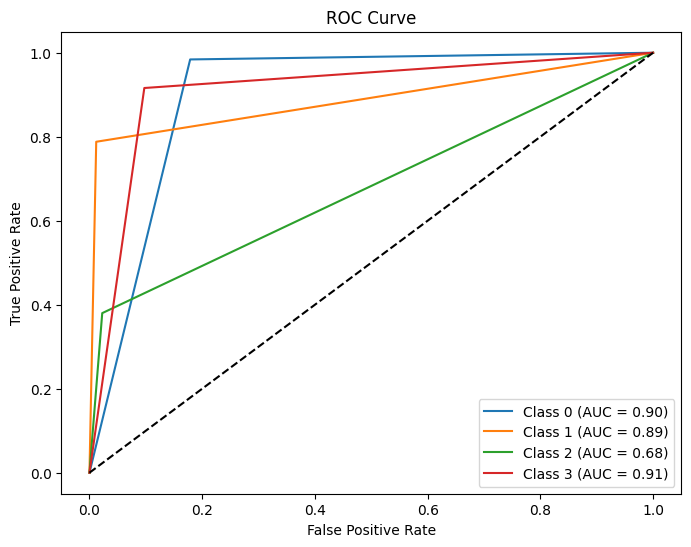

In [7]:
#Visualizations
#import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# # Load the best model
# best_model = MyImprovedCNN(num_classes=num_classes).to(device)
# best_model.load_state_dict(torch.load("best_model_weights.pt"))
# best_model.eval()

# Repeat test accuracy/loss for the same number of epochs
test_accuracy_line = [accuracy] * num_epochs
test_loss_line = [val_epoch_loss] * num_epochs

# Plot training, validation, and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracy_line, label='Test Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Validation, and Test Accuracy')
plt.show()

# Plot training, validation, and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_loss_line, label='Test Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training, Validation, and Test Loss')
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
all_labels_np = np.array(all_labels)
all_preds_np = np.array(all_preds)
n_classes = num_classes
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((all_labels_np == i).astype(int), (all_preds_np == i).astype(int))
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [8]:
# --- Extension Code: Weighted Cross Entropy, Gradient Clipping, Early Stopping, and Model Improvement ---

# Compute class weights from training dataset labels for weighted cross entropy loss.
import numpy as np

train_labels_array = np.array(train_dataset.labels)


# Ensure labels are in a flat 1D array
if train_labels_array.ndim > 1:
    train_labels_array = train_labels_array.flatten()

# Count samples per class
class_counts = np.bincount(train_labels_array)

# Count samples per class
class_counts = np.bincount(train_labels_array)
# Inverse frequency: lower frequency classes get higher weights
class_weights = 1. / class_counts.astype(np.float32)
# Normalize weights (optional but useful for stability)
class_weights = class_weights / np.sum(class_weights) * len(class_counts)
class_weights_tensor = torch.FloatTensor(class_weights).to(device)
print("Class weights:", class_weights_tensor)

# Define loss functions:
loss_fn_base = nn.CrossEntropyLoss()  # Base loss
loss_fn_weighted = nn.CrossEntropyLoss(weight=class_weights_tensor)  # Weighted cross entropy

# Training function with gradient clipping and early stopping
def train_model(model, train_loader, val_loader, loss_function, optimizer, scheduler, num_epochs=50, grad_clip_max=5.0, early_stopping_patience=5):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    best_val_loss = float('inf')
    best_model_weights = None
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).squeeze()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            # Apply gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip_max)
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            total_train += inputs.size(0)

        epoch_loss = running_loss / total_train
        epoch_acc = running_corrects.double() / total_train
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        total_val = 0
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device).squeeze()
                outputs = model(val_inputs)
                loss = loss_function(outputs, val_labels)
                val_running_loss += loss.item() * val_inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == val_labels.data)
                total_val += val_inputs.size(0)

        val_epoch_loss = val_running_loss / total_val
        val_epoch_acc = val_running_corrects.double() / total_val
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc.item())

        # Scheduler step based on validation loss
        scheduler.step(val_epoch_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

        # Early stopping: if no improvement then increment counter
        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss
            best_model_weights = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered.")
                break

    # Load the best model weights
    if best_model_weights is not None:
        model.load_state_dict(best_model_weights)

    return model, train_losses, train_accuracies, val_losses, val_accuracies

# Evaluation function on test data
def evaluate_model(model, test_loader, loss_function):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total_test = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).squeeze()
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)
            total_test += inputs.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss = running_loss / total_test
    test_acc = running_corrects.double() / total_test
    return test_loss, test_acc.item(), all_preds, all_labels

# Function to plot training, validation, and test metrics
def plot_metrics(train_metric, val_metric, test_metric, metric_name="Accuracy", epochs=None):
    if epochs is None:
        epochs = range(1, len(train_metric)+1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, train_metric, label='Training '+metric_name)
    plt.plot(epochs, val_metric, label='Validation '+metric_name)
    plt.plot(epochs, [test_metric]*len(epochs), label='Test '+metric_name, linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.title(f'Training, Validation and Test {metric_name}')
    plt.legend()
    plt.show()

Class weights: tensor([0.4290, 1.4065, 1.8525, 0.3121], device='cuda:0')


In [10]:
# Train Weighted Model (with Weighted CrossEntropyLoss)
weighted_model = MyCNN(num_classes=num_classes).to(device)
optimizer_weighted = optim.Adam(weighted_model.parameters(), lr=0.001)
scheduler_weighted = optim.lr_scheduler.CosineAnnealingLR(optimizer_weighted, T_max=10, eta_min=1e-6)

print("\nTraining Weighted Model with Weighted CrossEntropyLoss")
weighted_model, weighted_train_losses, weighted_train_acc, weighted_val_losses, weighted_val_acc = train_model(
    weighted_model, train_loader, val_loader, loss_fn_weighted, optimizer_weighted, scheduler_weighted, num_epochs=50, grad_clip_max=5.0, early_stopping_patience=5
)

weighted_test_loss, weighted_test_acc, weighted_all_preds, weighted_all_labels = evaluate_model(weighted_model, test_loader, loss_fn_weighted)
print(f"Weighted Model Test Loss: {weighted_test_loss:.4f}, Test Accuracy: {weighted_test_acc:.4f}")


Training Weighted Model with Weighted CrossEntropyLoss


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1/50 - Train Loss: 0.7351, Train Acc: 0.7314, Val Loss: 0.7337, Val Acc: 0.8106
Epoch 2/50 - Train Loss: 0.5834, Train Acc: 0.7890, Val Loss: 0.5322, Val Acc: 0.8292
Epoch 3/50 - Train Loss: 0.5258, Train Acc: 0.8116, Val Loss: 0.6642, Val Acc: 0.8051
Epoch 4/50 - Train Loss: 0.4910, Train Acc: 0.8277, Val Loss: 0.4288, Val Acc: 0.8730
Epoch 5/50 - Train Loss: 0.4651, Train Acc: 0.8356, Val Loss: 0.4380, Val Acc: 0.8456
Epoch 6/50 - Train Loss: 0.4465, Train Acc: 0.8429, Val Loss: 0.4168, Val Acc: 0.8112
Epoch 7/50 - Train Loss: 0.4282, Train Acc: 0.8501, Val Loss: 0.3959, Val Acc: 0.8705
Epoch 8/50 - Train Loss: 0.4197, Train Acc: 0.8527, Val Loss: 0.4022, Val Acc: 0.8989
Epoch 9/50 - Train Loss: 0.4068, Train Acc: 0.8573, Val Loss: 0.3899, Val Acc: 0.8580
Epoch 10/50 - Train Loss: 0.3971, Train Acc: 0.8602, Val Loss: 0.4380, Val Acc: 0.8547
Epoch 11/50 - Train Loss: 0.3880, Train Acc: 0.8637, Val Loss: 0.3839, Val Acc: 0.8538
Epoch 12/50 - Train Loss: 0.3825, Train Acc: 0.8657,

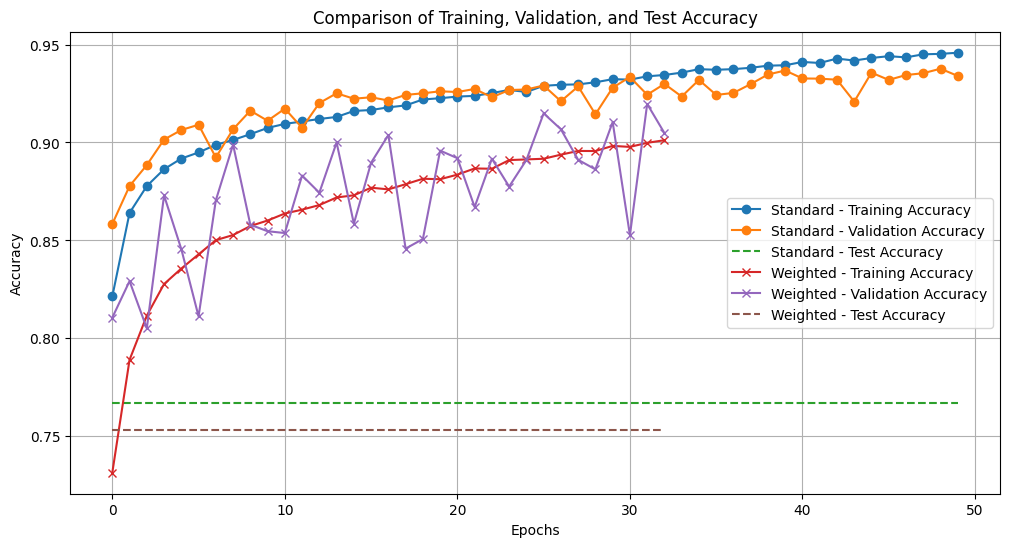

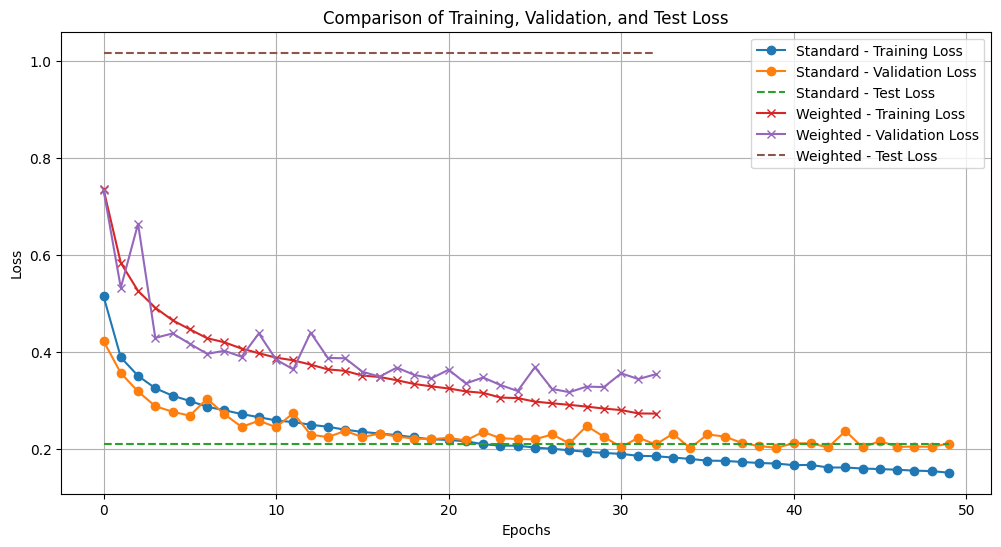

In [11]:
# Plot comparison of accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
# Baseline (Standard) model curves
plt.plot(train_accuracies, label='Standard - Training Accuracy', marker='o')
plt.plot(val_accuracies, label='Standard - Validation Accuracy', marker='o')
plt.plot(test_accuracy_line, label='Standard - Test Accuracy', linestyle='dashed')

# Weighted model curves (for consistency, we repeat the final test accuracy for each epoch)
plt.plot(weighted_train_acc, label='Weighted - Training Accuracy', marker='x')
plt.plot(weighted_val_acc, label='Weighted - Validation Accuracy', marker='x')
plt.plot([weighted_test_acc]*len(weighted_train_acc), label='Weighted - Test Accuracy', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Training, Validation, and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot comparison of loss

plt.figure(figsize=(12,6))
# Baseline (Standard) model curves
plt.plot(train_losses, label='Standard - Training Loss', marker='o')
plt.plot(val_losses, label='Standard - Validation Loss', marker='o')
plt.plot(test_loss_line, label='Standard - Test Loss', linestyle='dashed')

# Weighted model curves (repeat final test loss for each epoch)
plt.plot(weighted_train_losses, label='Weighted - Training Loss', marker='x')
plt.plot(weighted_val_losses, label='Weighted - Validation Loss', marker='x')
plt.plot([weighted_test_loss]*len(weighted_train_losses), label='Weighted - Test Loss', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Training, Validation, and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# --- Additional Performance Improvement: Define an Improved CNN Model with Dropout ---
class MyImprovedCNN(nn.Module):
    def __init__(self, num_classes):
        super(MyImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.dropout3 = nn.Dropout(0.25)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.dropout4 = nn.Dropout(0.25)

        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.dropout5 = nn.Dropout(0.25)

        self.pool = nn.MaxPool2d(2, 2)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout4(x)

        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Train the improved model (here we use the weighted loss)
improved_model = MyImprovedCNN(num_classes=num_classes).to(device)
optimizer_improved = optim.Adam(improved_model.parameters(), lr=0.001)
scheduler_improved = optim.lr_scheduler.CosineAnnealingLR(optimizer_improved, T_max=10, eta_min=1e-6)

print("\nTraining Improved Model with Dropout and Weighted CrossEntropyLoss")
improved_model, imp_train_losses, imp_train_acc, imp_val_losses, imp_val_acc = train_model(
    improved_model, train_loader, val_loader, loss_fn_weighted, optimizer_improved, scheduler_improved, num_epochs=50, grad_clip_max=5.0, early_stopping_patience=10
)

imp_test_loss, imp_test_acc, imp_all_preds, imp_all_labels = evaluate_model(improved_model, test_loader, loss_fn_weighted)
print(f"Improved Model Test Loss: {imp_test_loss:.4f}, Test Accuracy: {imp_test_acc:.4f}")



Training Improved Model with Dropout and Weighted CrossEntropyLoss
Epoch 1/50 - Train Loss: 0.8881, Train Acc: 0.6685, Val Loss: 0.6424, Val Acc: 0.7804
Epoch 2/50 - Train Loss: 0.7481, Train Acc: 0.7235, Val Loss: 0.6109, Val Acc: 0.7186
Epoch 3/50 - Train Loss: 0.7083, Train Acc: 0.7390, Val Loss: 0.5699, Val Acc: 0.7988
Epoch 4/50 - Train Loss: 0.6794, Train Acc: 0.7526, Val Loss: 0.5626, Val Acc: 0.8318
Epoch 5/50 - Train Loss: 0.6582, Train Acc: 0.7590, Val Loss: 0.5610, Val Acc: 0.7887
Epoch 6/50 - Train Loss: 0.6433, Train Acc: 0.7641, Val Loss: 0.5643, Val Acc: 0.7501
Epoch 7/50 - Train Loss: 0.6283, Train Acc: 0.7712, Val Loss: 0.5258, Val Acc: 0.7856
Epoch 8/50 - Train Loss: 0.6184, Train Acc: 0.7737, Val Loss: 0.5071, Val Acc: 0.8076
Epoch 9/50 - Train Loss: 0.6093, Train Acc: 0.7782, Val Loss: 0.4762, Val Acc: 0.8188
Epoch 10/50 - Train Loss: 0.6038, Train Acc: 0.7823, Val Loss: 0.5508, Val Acc: 0.8365
Epoch 11/50 - Train Loss: 0.5972, Train Acc: 0.7837, Val Loss: 0.4796, 

In [15]:
# # Save the best improved model weights
torch.save(improved_model.state_dict(), "best_model_weights.pt")
print("Best model weights saved as 'best_model_weights.pt'.")

Best model weights saved as 'best_model_weights.pt'.


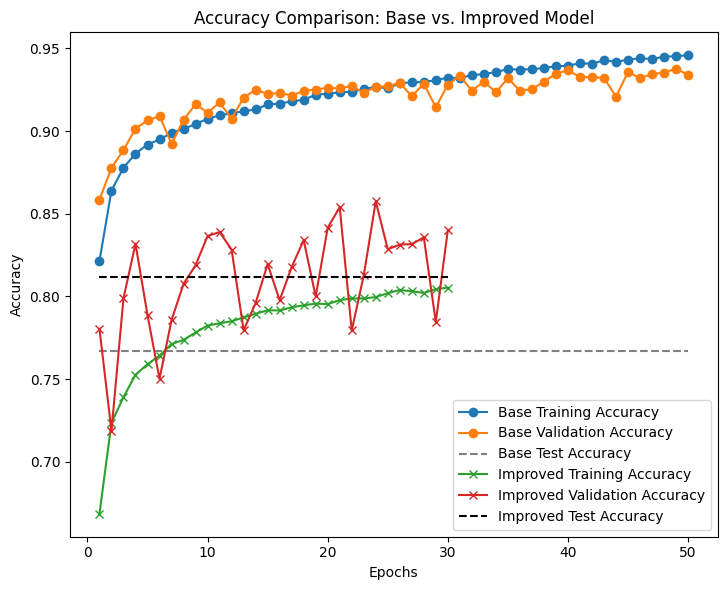

In [16]:
#Comparison: Base Model vs. Improved Model

# For the base model:
# train_accuracies, val_accuracies, train_losses, val_losses are from the original training loop.
# 'accuracy' is the base model's test accuracy.
# Here the final validation loss (val_epoch_loss) as a proxy for test loss (if no separate test loss is computed).
base_epochs = range(1, len(train_accuracies) + 1)
base_test_accuracy_line = [accuracy] * len(train_accuracies)

# For the improved model:
# imp_train_acc, imp_val_acc, imp_train_losses, imp_val_losses are obtained from the train_model() function.
# 'imp_test_acc' and 'imp_test_loss' are obtained from evaluate_model() for the improved model.
improved_epochs = range(1, len(imp_train_acc) + 1)
improved_test_accuracy_line = [imp_test_acc] * len(imp_train_acc)

plt.figure(figsize=(14, 6))

# Plot Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(base_epochs, train_accuracies, label='Base Training Accuracy', marker='o')
plt.plot(base_epochs, val_accuracies, label='Base Validation Accuracy', marker='o')
plt.plot(base_epochs, base_test_accuracy_line, label='Base Test Accuracy', linestyle='dashed', color='gray')
plt.plot(improved_epochs, imp_train_acc, label='Improved Training Accuracy', marker='x')
plt.plot(improved_epochs, imp_val_acc, label='Improved Validation Accuracy', marker='x')
plt.plot(improved_epochs, improved_test_accuracy_line, label='Improved Test Accuracy', linestyle='dashed', color='black')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Base vs. Improved Model')
plt.legend()

plt.tight_layout()
plt.show()
